In [1]:
%matplotlib inline

In [2]:
import MySQLdb as mdb

con = mdb.connect(host = 'localhost', 
                  user = 'root', 
                  passwd = 'dwdstudent2015', 
                  charset='utf8', use_unicode=True, database='citibike');

In [3]:
query = '''
SELECT station_id AS id, 
       AVG(available_bikes/(available_bikes+available_docks)) AS perc, 
       CONCAT(DATE(last_communication_time), ' ',  SEC_TO_TIME((TIME_TO_SEC(last_communication_time) DIV 900) * 900)) AS time  

FROM citibike.Docks_Status

WHERE last_communication_time > '2017-01-30' 
    AND status_key=1 
    AND available_bikes+available_docks>0

GROUP BY station_id, time
'''

In [4]:
import pandas as pd

cur = con.cursor(mdb.cursors.DictCursor)
cur.execute(query)
df = pd.DataFrame(list(cur.fetchall()))
cur.close()
con.close()
df['perc'] = df['perc'].astype(float)
df['time'] = pd.to_datetime(df['time'])


In [15]:
df.groupby('time').mean()

,id,perc
time,,
2017-01-31 00:00:00,1937.745736,0.343861
2017-01-31 00:15:00,1937.745736,0.343910
2017-01-31 00:30:00,1937.745736,0.344176
2017-01-31 00:45:00,1935.940994,0.344604
2017-01-31 01:00:00,1931.848910,0.345135
2017-01-31 01:15:00,1935.940994,0.344665
2017-01-31 01:30:00,1935.412131,0.345701
2017-01-31 01:45:00,1937.616460,0.345210
2017-01-31 02:00:00,1935.808709,0.344901


In [16]:
df.groupby('time').mean()['perc']

time
2017-01-31 00:00:00    0.343861
2017-01-31 00:15:00    0.343910
2017-01-31 00:30:00    0.344176
2017-01-31 00:45:00    0.344604
2017-01-31 01:00:00    0.345135
2017-01-31 01:15:00    0.344665
2017-01-31 01:30:00    0.345701
2017-01-31 01:45:00    0.345210
2017-01-31 02:00:00    0.344901
2017-01-31 02:15:00    0.344095
2017-01-31 02:30:00    0.343533
2017-01-31 02:45:00    0.343069
2017-01-31 03:00:00    0.343198
2017-01-31 03:15:00    0.343793
2017-01-31 03:30:00    0.344238
2017-01-31 03:45:00    0.344869
2017-01-31 04:00:00    0.344805
2017-01-31 04:15:00    0.344496
2017-01-31 04:30:00    0.344137
2017-01-31 04:45:00    0.343227
2017-01-31 05:00:00    0.342791
2017-01-31 05:15:00    0.341878
2017-01-31 05:30:00    0.340596
2017-01-31 05:45:00    0.340846
2017-01-31 06:00:00    0.340695
2017-01-31 06:15:00    0.339671
2017-01-31 06:30:00    0.338869
2017-01-31 06:45:00    0.336177
2017-01-31 07:00:00    0.334969
2017-01-31 07:15:00    0.331332
                         ...   
201

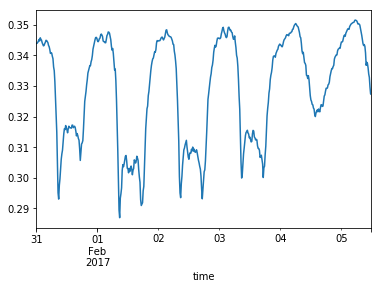

In [17]:
df.groupby('time').mean()['perc'].plot()

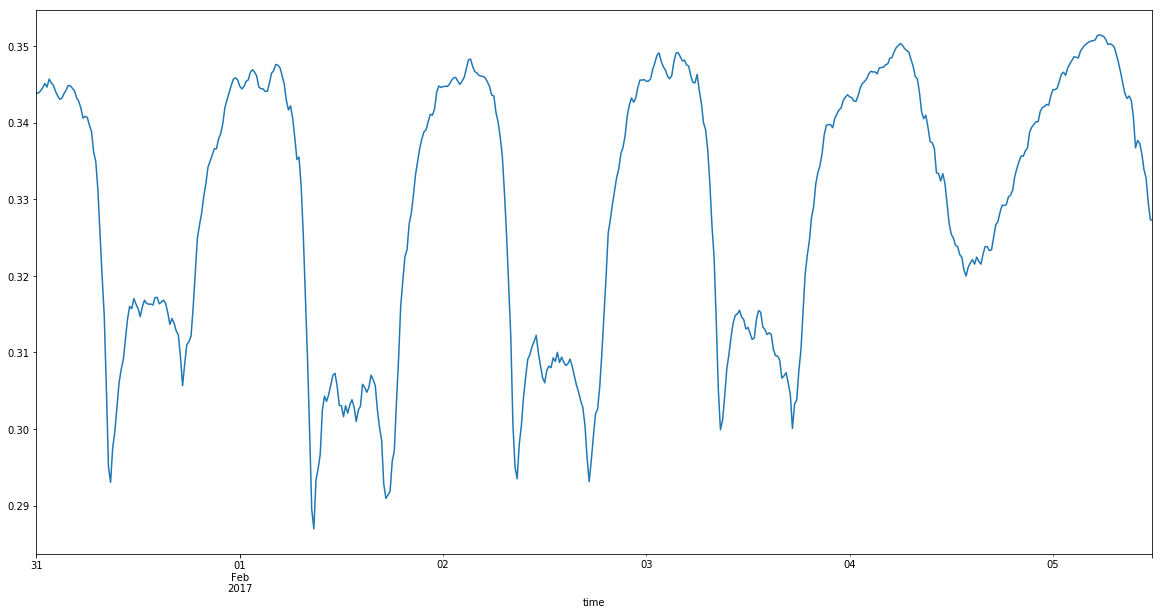

In [18]:
df.groupby('time').mean()['perc'].plot(figsize=(20,10))

In [6]:
import numpy as np
df2 = df.pivot_table(index='time', columns='id', values='perc', aggfunc=np.mean).fillna('pad')

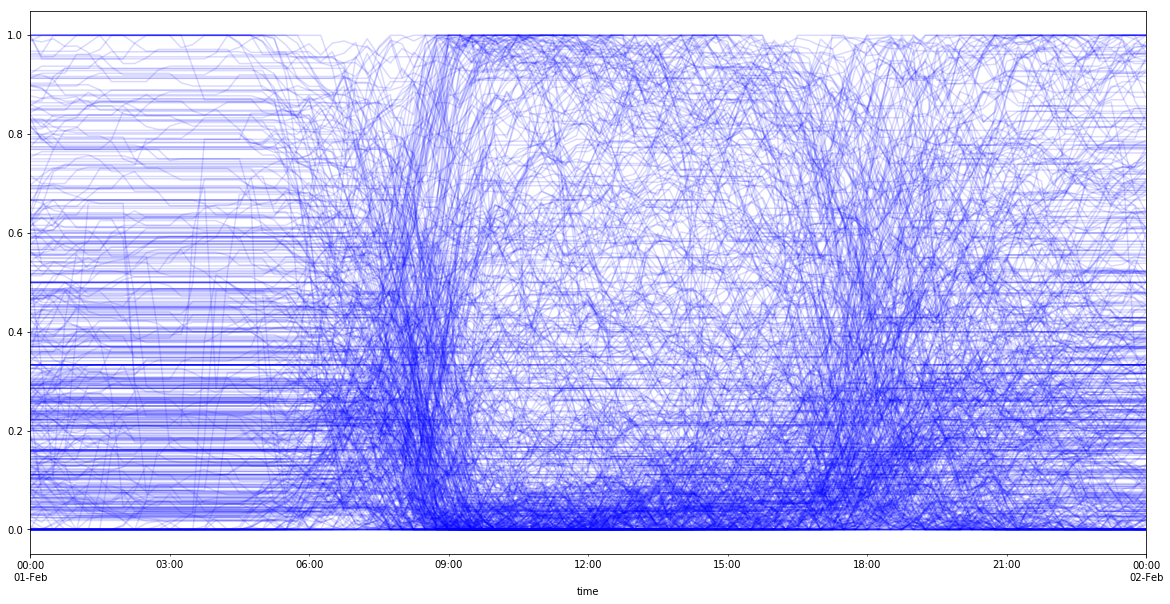

In [22]:
df2.plot(
    alpha=0.15, 
    color='b', 
    legend=False, 
    figsize=(20,10), 
    xlim=('2017-02-01','2017-02-02')
)

In [ ]:
# df_empty_morning = df2[df2.columns[df2.iloc[0]<0.1]]
# df_empty_morning.plot(alpha=0.1, color='b',legend=False, figsize=(20,10))

In [ ]:
# df_full_midnight = df2[df2.columns[df2.iloc[0]>0.9]]
# df_full_midnight.plot(alpha=0.1, color='b',legend=False, figsize=(20,10))

In [31]:
similarities = df2.corr(method='pearson')
distances = ((.5*(1-similarities))**2)
distances

id,72,79,82,83,116,119,120,127,143,144,...,3428,3429,3430,3431,3434,3435,3436,3438,3440,3443
id,,,,,,,,,,,,,,,,,,,,,
72,0.000000,0.532202,0.106581,0.089917,0.424843,0.173028,0.174103,0.319414,0.327781,0.139573,...,0.086475,0.431956,0.234571,0.306469,0.170850,0.233535,0.116895,0.253370,0.185073,0.221748
79,0.532202,0.000000,0.368921,0.435006,0.160392,0.304463,0.604623,0.196308,0.057044,0.223995,...,0.259714,0.088811,0.680031,0.517682,0.436185,0.290861,0.188880,0.450963,0.109441,0.101890
82,0.106581,0.368921,0.000000,0.283881,0.506089,0.392358,0.196957,0.285204,0.155617,0.372283,...,0.303109,0.252782,0.149253,0.116048,0.209408,0.273700,0.259239,0.133812,0.453358,0.318756
83,0.089917,0.435006,0.283881,0.000000,0.214679,0.121018,0.190725,0.503965,0.471308,0.060232,...,0.118421,0.322767,0.336301,0.364912,0.314798,0.418318,0.142635,0.289114,0.090806,0.183597
116,0.424843,0.160392,0.506089,0.214679,0.000000,0.159222,0.363216,0.306503,0.163051,0.156215,...,0.124940,0.446536,0.372267,0.422762,0.476940,0.180138,0.141032,0.222961,0.105429,0.111181
119,0.173028,0.304463,0.392358,0.121018,0.159222,0.000000,0.077126,0.154175,0.440568,0.087904,...,0.211334,0.541158,0.184885,0.419849,0.076907,0.436038,0.228904,0.163415,0.222332,0.225793
120,0.174103,0.604623,0.196957,0.190725,0.363216,0.077126,0.000000,0.110282,0.598363,0.367148,...,0.338006,0.505692,0.036072,0.093418,0.014747,0.286590,0.512087,0.118692,0.555276,0.564789
127,0.319414,0.196308,0.285204,0.503965,0.306503,0.154175,0.110282,0.000000,0.346912,0.514594,...,0.287776,0.452098,0.209574,0.349379,0.091267,0.257690,0.274618,0.292148,0.301092,0.287785
143,0.327781,0.057044,0.155617,0.471308,0.163051,0.440568,0.598363,0.346912,0.000000,0.272439,...,0.228668,0.132619,0.440833,0.342257,0.521035,0.119661,0.103286,0.280840,0.210715,0.086086


In [32]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=2, linkage='average')
cluster.fit(distances.values)
colors = list(['r','b', 'g', 'm', 'y', 'k', 'w', 'c'])

In [33]:
# Associate each data point with a cluster
labels = pd.DataFrame(list(zip(distances.index.values.tolist(), cluster.labels_)), columns = ["id", "cluster"])
labels.set_index("id", inplace=True)
# Assign a color to each cluster, so that we can plot each station-timeline with the cluster color
labels['color'] = labels['cluster'].apply(lambda x : colors[x])

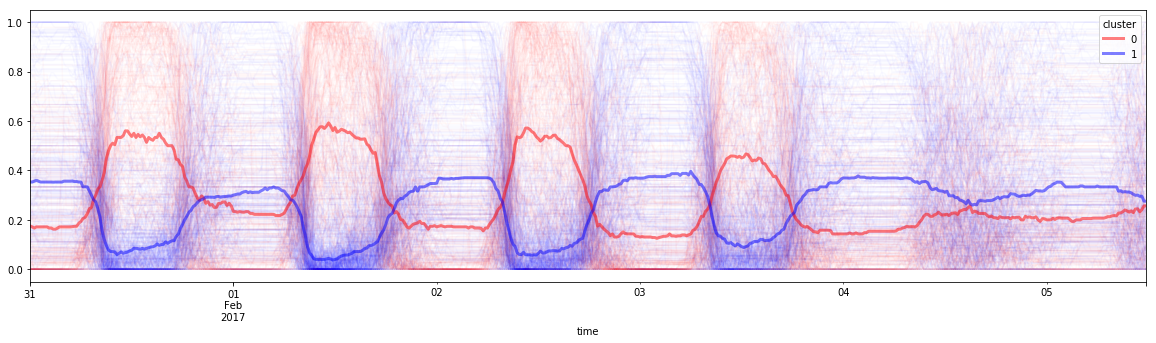

In [34]:
ax = df2.plot(alpha=0.02, legend=False, figsize=(20,5), color=labels["color"])
agg = df.set_index("time").groupby(["id", pd.TimeGrouper("15T")]).mean().join(labels, how='inner')
result = pd.DataFrame(agg.to_records())
import numpy as np

'''
t = result.pivot_table(
        index='time', 
        columns='cluster', 
        values='perc', 
        aggfunc=lambda x: np.percentile(x, 25)
    ).plot(
        figsize=(20,10), linewidth = 2, alpha = 0.25,
        color=colors, ax = ax
    )
'''
'''
t = result.pivot_table(
        index='time', 
        columns='cluster', 
        values='perc', 
        aggfunc=lambda x: np.percentile(x, 75)
    ).plot(
        figsize=(20,10), linewidth = 2, alpha = 0.25,
        color=colors, ax = ax
    )
    
'''

t = result.pivot_table(
        index='time', 
        columns='cluster', 
        values='perc', 
        aggfunc=lambda x: np.percentile(x, 50)
    ).plot(
        figsize=(20,5), 
        linewidth = 3, 
        alpha = 0.5,
        color=colors, 
        ax = ax
    )

